# 3 TESTING NOTEBOOK

In [1]:
# INSTALL SCIKERAS PACKAGES
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# IMPORT TENSORFLOW/KERAS
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
from tensorflow.keras.preprocessing import image
from keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input

from keras.layers.core import Flatten
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

# SCIKIT-LEARN/SCIKERAS
from sklearn import preprocessing
import sklearn.metrics as metrics
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import classification_report

# IMPORT OTHER MODULES
import os
import os.path
import sys
import glob
import datetime
from pathlib import Path

import fnmatch # to count number of image per folder easily
import random # to select random images from a folder
import numpy as np
import pandas as pd
from os import mkdir
import seaborn as sns
from pathlib import Path
from shutil import copyfile # to import "copyfile"
from numpy.random import seed
import matplotlib.image as img_mat
import plotly.figure_factory as ff # for printing the heatmap
from collections import defaultdict
from matplotlib import pyplot as plt
from IPython.display import Javascript

# CV2
import cv2
from google.colab.patches import cv2_imshow 

In [3]:
# Link Google Drive account
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# CONSTANT
SEED_VALUE = 42
num_classes = 10 # number of output classes
batch_size = 16
SIZE = 224  #Resize images --> https://www.researchgate.net/post/Which_Image_resolution_should_I_use_for_training_for_deep_neural_network#:~:text=So%20the%20rule%20of%20thumb,for%20something%20smaller%20and%20easier.

# PATH TO THE DATA
ORIGINAL_DATA = "/content/gdrive/MyDrive/Data_Science_2020-2022/Secondo_anno_Secondo_Semestre/FoDL_Project/Project_Example_Food/ExampleFoodImageDataset"
DIR_TEST_DATA = '/content/gdrive/MyDrive/Data_Science_2020-2022/Secondo_anno_Secondo_Semestre/FoDL_Project/Project_Example_Food/train_test/test/*' # path contenente i sottoinsiemi di train, test

# LOAD THE FOLDERS WHERE THE TRAINING/TESTING/VALIDATION DATA ARE STORED
base_path_train = '/content/gdrive/MyDrive/Data_Science_2020-2022/Secondo_anno_Secondo_Semestre/FoDL_Project/Project_Example_Food/train_test/train/'
base_path_test = '/content/gdrive/MyDrive/Data_Science_2020-2022/Secondo_anno_Secondo_Semestre/FoDL_Project/Project_Example_Food/train_test/test/'
base_path_val = '/content/gdrive/MyDrive/Data_Science_2020-2022/Secondo_anno_Secondo_Semestre/FoDL_Project/Project_Example_Food/train_test/val/'

----------------------

# Correct solution from here

In [5]:
# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255) 

# this is a generator
test_generator = test_datagen.flow_from_directory(
    base_path_test,
    target_size=(224,224),
    batch_size=batch_size,
    shuffle=False,
    class_mode="categorical",
    seed = SEED_VALUE)

Found 193 images belonging to 10 classes.


In [6]:
# FUNCTION TO LOAD THE IMAGE AND PREPROCESS IT
def prepare_image(file_input, show=True):
    img = image.load_img(file_input, target_size=(SIZE, SIZE))
    img_array = image.img_to_array(img)
    img_array= (img_array/255.0)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    
    if show:
      plt.imshow(img_array_expanded_dims[0])                           
      plt.axis('off')
      plt.show()
      print("-----------------------")

    return img_array_expanded_dims

    # return img_array_expanded_dims

In [14]:
# CREATE A LIST TO STORE THE PATH OF EACH RANDOM IMAGE
inference_data = list()
current_directory = Path(base_path_val)

for folder in current_directory.iterdir():
  split_str = str(folder).split("/")[-1] # get the folder name
  print(split_str)
  file_path_type = [f"{current_directory}/{split_str}/*.jpg"]  
  # print(file_path_type)
  images = glob.glob(random.choice(file_path_type))
  # print(images)

  for i in range(5):
    # if len(inference_data) > 1:
    #   break
    random_image = random.choice(images)
    # print(random_image)
    inference_data.append(random_image)
    # img_raw = cv2.imread(random_image)
    print(inference_data)
    print("------------")

french_fries
['/content/gdrive/MyDrive/Data_Science_2020-2022/Secondo_anno_Secondo_Semestre/FoDL_Project/Project_Example_Food/train_test/val/french_fries/french_fries_24.jpg_RESIZED.jpg']
------------
['/content/gdrive/MyDrive/Data_Science_2020-2022/Secondo_anno_Secondo_Semestre/FoDL_Project/Project_Example_Food/train_test/val/french_fries/french_fries_24.jpg_RESIZED.jpg', '/content/gdrive/MyDrive/Data_Science_2020-2022/Secondo_anno_Secondo_Semestre/FoDL_Project/Project_Example_Food/train_test/val/french_fries/cropfries36.jpg_RESIZED.jpg']
------------
['/content/gdrive/MyDrive/Data_Science_2020-2022/Secondo_anno_Secondo_Semestre/FoDL_Project/Project_Example_Food/train_test/val/french_fries/french_fries_24.jpg_RESIZED.jpg', '/content/gdrive/MyDrive/Data_Science_2020-2022/Secondo_anno_Secondo_Semestre/FoDL_Project/Project_Example_Food/train_test/val/french_fries/cropfries36.jpg_RESIZED.jpg', '/content/gdrive/MyDrive/Data_Science_2020-2022/Secondo_anno_Secondo_Semestre/FoDL_Project/Proje

In [8]:
# LOAD SAVED MODEL AND GET PATH FOR AN IMAGE
best_model = tf.keras.models.load_model("/content/gdrive/MyDrive/Data_Science_2020-2022/Secondo_anno_Secondo_Semestre/FoDL_Project/Project_Example_Food/saved_models/model_mobilenetV2_QUARTA_PROVA_FUNZIONANTE_REJ_CLASS.h5") 

french_fries


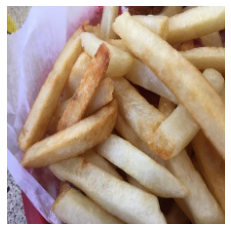

-----------------------
(1, 224, 224, 3)
1/1 [==============================] - 0s 76ms/step
% prediction is: 100.0
Output index is: [2]
The class in this image should be: french_fries.
The groud truth is french_fries .
-----------------------
french_fries


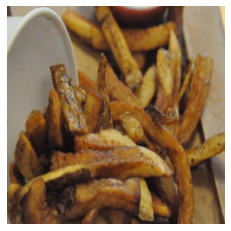

-----------------------
(1, 224, 224, 3)
1/1 [==============================] - 0s 68ms/step
% prediction is: 100.0
Output index is: [2]
The class in this image should be: french_fries.
The groud truth is french_fries .
-----------------------
french_fries


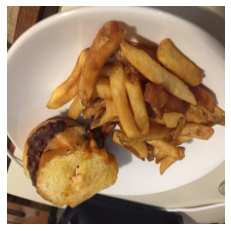

-----------------------
(1, 224, 224, 3)
1/1 [==============================] - 0s 88ms/step
% prediction is: 80.31
Output index is: [2]
The class in this image should be: french_fries.
The groud truth is french_fries .
-----------------------
french_fries


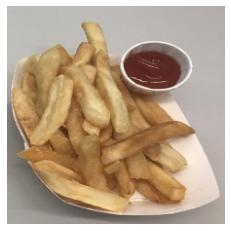

-----------------------
(1, 224, 224, 3)
1/1 [==============================] - 0s 69ms/step
% prediction is: 100.0
Output index is: [2]
The class in this image should be: french_fries.
The groud truth is french_fries .
-----------------------
french_fries


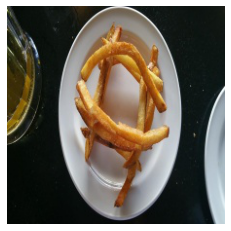

-----------------------
(1, 224, 224, 3)
1/1 [==============================] - 0s 65ms/step
% prediction is: 99.67
Output index is: [2]
The class in this image should be: french_fries.
The groud truth is french_fries .
-----------------------
caprese_salad


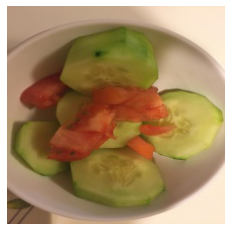

-----------------------
(1, 224, 224, 3)
1/1 [==============================] - 0s 79ms/step
% prediction is: 100.0
Output index is: [1]
The class in this image should be: caprese_salad.
The groud truth is caprese_salad .
-----------------------
caprese_salad


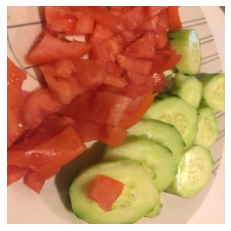

-----------------------
(1, 224, 224, 3)
1/1 [==============================] - 0s 73ms/step
% prediction is: 94.09
Output index is: [1]
The class in this image should be: caprese_salad.
The groud truth is caprese_salad .
-----------------------
caprese_salad


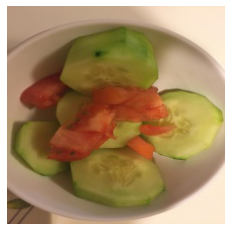

-----------------------
(1, 224, 224, 3)
1/1 [==============================] - 0s 75ms/step
% prediction is: 100.0
Output index is: [1]
The class in this image should be: caprese_salad.
The groud truth is caprese_salad .
-----------------------
caprese_salad


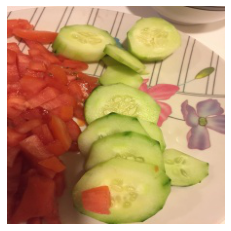

-----------------------
(1, 224, 224, 3)
1/1 [==============================] - 0s 63ms/step
% prediction is: 98.32
Output index is: [1]
The class in this image should be: caprese_salad.
The groud truth is caprese_salad .
-----------------------
caprese_salad


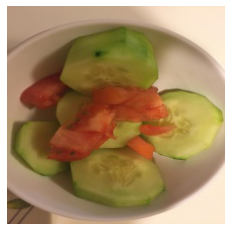

-----------------------
(1, 224, 224, 3)
1/1 [==============================] - 0s 81ms/step
% prediction is: 100.0
Output index is: [1]
The class in this image should be: caprese_salad.
The groud truth is caprese_salad .
-----------------------
pizza


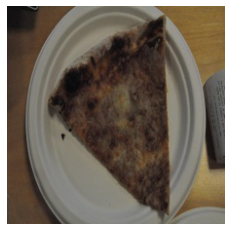

-----------------------
(1, 224, 224, 3)
1/1 [==============================] - 0s 79ms/step
% prediction is: 100.0
Output index is: [6]
The class in this image should be: pizza.
The groud truth is pizza .
-----------------------
pizza


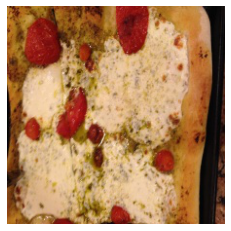

-----------------------
(1, 224, 224, 3)
1/1 [==============================] - 0s 80ms/step
% prediction is: 99.99
Output index is: [6]
The class in this image should be: pizza.
The groud truth is pizza .
-----------------------
pizza


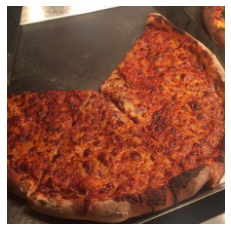

-----------------------
(1, 224, 224, 3)
1/1 [==============================] - 0s 75ms/step
% prediction is: 100.0
Output index is: [6]
The class in this image should be: pizza.
The groud truth is pizza .
-----------------------
pizza


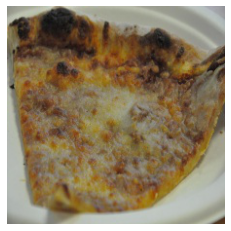

-----------------------
(1, 224, 224, 3)
1/1 [==============================] - 0s 75ms/step
% prediction is: 100.0
Output index is: [6]
The class in this image should be: pizza.
The groud truth is pizza .
-----------------------
pizza


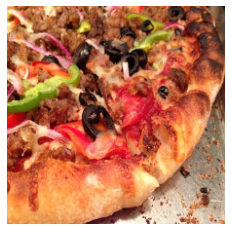

-----------------------
(1, 224, 224, 3)
1/1 [==============================] - 0s 71ms/step
% prediction is: 100.0
Output index is: [6]
The class in this image should be: pizza.
The groud truth is pizza .
-----------------------
greek_salad


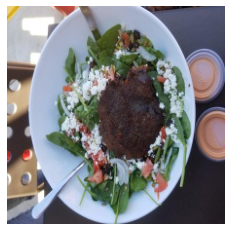

-----------------------
(1, 224, 224, 3)
1/1 [==============================] - 0s 70ms/step
% prediction is: 59.08
Output index is: [3]
The class in this image should be: greek_salad.
The groud truth is greek_salad .
-----------------------
greek_salad


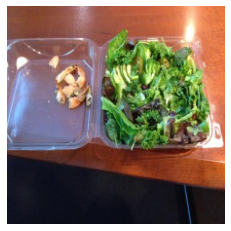

-----------------------
(1, 224, 224, 3)
1/1 [==============================] - 0s 78ms/step
% prediction is: 45.89
Output index is: [9]
I'm sorry, I cannot recognise any type of food here! Try again!
The groud truth is greek_salad
-----------------------
greek_salad


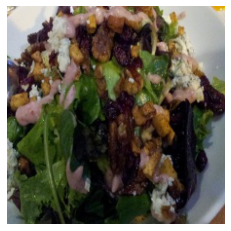

-----------------------
(1, 224, 224, 3)
1/1 [==============================] - 0s 100ms/step
% prediction is: 48.19
Output index is: [9]
I'm sorry, I cannot recognise any type of food here! Try again!
The groud truth is greek_salad
-----------------------
greek_salad


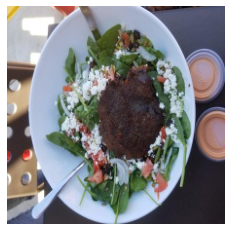

-----------------------
(1, 224, 224, 3)
1/1 [==============================] - 0s 96ms/step
% prediction is: 59.08
Output index is: [3]
The class in this image should be: greek_salad.
The groud truth is greek_salad .
-----------------------
greek_salad


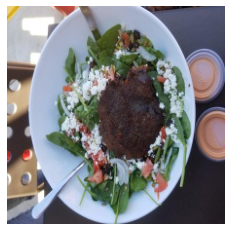

-----------------------
(1, 224, 224, 3)
1/1 [==============================] - 0s 84ms/step
% prediction is: 59.08
Output index is: [3]
The class in this image should be: greek_salad.
The groud truth is greek_salad .
-----------------------
sashimi


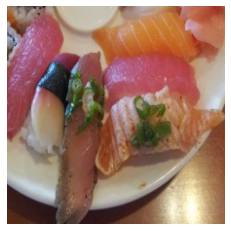

-----------------------
(1, 224, 224, 3)
1/1 [==============================] - 0s 81ms/step
% prediction is: 96.88
Output index is: [4]
The class in this image should be: hamburger.
The groud truth is sashimi .
-----------------------
sashimi


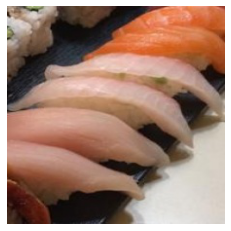

-----------------------
(1, 224, 224, 3)
1/1 [==============================] - 0s 77ms/step
% prediction is: 82.2
Output index is: [8]
The class in this image should be: sashimi.
The groud truth is sashimi .
-----------------------
sashimi


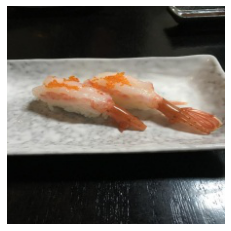

-----------------------
(1, 224, 224, 3)
1/1 [==============================] - 0s 71ms/step
% prediction is: 94.14
Output index is: [8]
The class in this image should be: sashimi.
The groud truth is sashimi .
-----------------------
sashimi


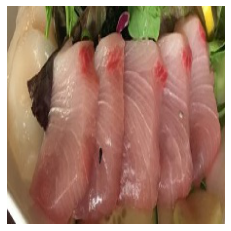

-----------------------
(1, 224, 224, 3)
1/1 [==============================] - 0s 80ms/step
% prediction is: 100.0
Output index is: [8]
The class in this image should be: sashimi.
The groud truth is sashimi .
-----------------------
sashimi


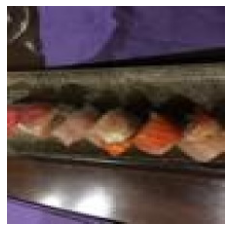

-----------------------
(1, 224, 224, 3)
1/1 [==============================] - 0s 67ms/step
% prediction is: 45.88
Output index is: [6]
I'm sorry, I cannot recognise any type of food here! Try again!
The groud truth is sashimi
-----------------------
hot_dog


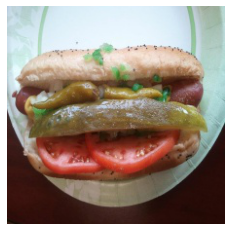

-----------------------
(1, 224, 224, 3)
1/1 [==============================] - 0s 67ms/step
% prediction is: 97.57
Output index is: [4]
The class in this image should be: hamburger.
The groud truth is hot_dog .
-----------------------
hot_dog


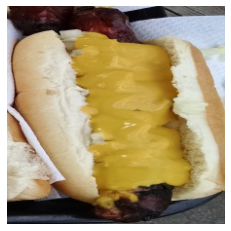

-----------------------
(1, 224, 224, 3)
1/1 [==============================] - 0s 71ms/step
% prediction is: 100.0
Output index is: [5]
The class in this image should be: hot_dog.
The groud truth is hot_dog .
-----------------------
hot_dog


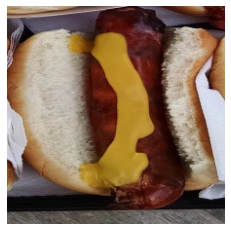

-----------------------
(1, 224, 224, 3)
1/1 [==============================] - 0s 80ms/step
% prediction is: 100.0
Output index is: [5]
The class in this image should be: hot_dog.
The groud truth is hot_dog .
-----------------------
hot_dog


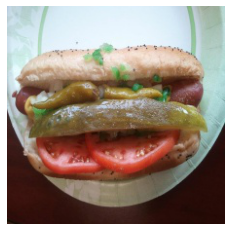

-----------------------
(1, 224, 224, 3)
1/1 [==============================] - 0s 110ms/step
% prediction is: 97.57
Output index is: [4]
The class in this image should be: hamburger.
The groud truth is hot_dog .
-----------------------
hot_dog


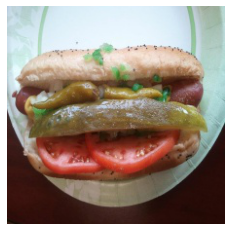

-----------------------
(1, 224, 224, 3)
1/1 [==============================] - 0s 87ms/step
% prediction is: 97.57
Output index is: [4]
The class in this image should be: hamburger.
The groud truth is hot_dog .
-----------------------
caesar_salad


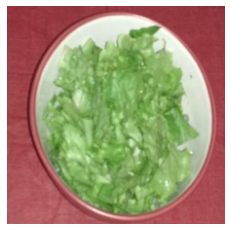

-----------------------
(1, 224, 224, 3)
1/1 [==============================] - 0s 96ms/step
% prediction is: 99.29
Output index is: [0]
The class in this image should be: caesar_salad.
The groud truth is caesar_salad .
-----------------------
caesar_salad


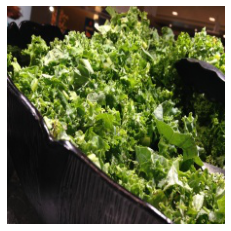

-----------------------
(1, 224, 224, 3)
1/1 [==============================] - 0s 70ms/step
% prediction is: 83.59
Output index is: [7]
The class in this image should be: rejection_class.
The groud truth is caesar_salad .
-----------------------
caesar_salad


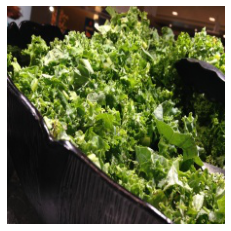

-----------------------
(1, 224, 224, 3)
1/1 [==============================] - 0s 91ms/step
% prediction is: 83.59
Output index is: [7]
The class in this image should be: rejection_class.
The groud truth is caesar_salad .
-----------------------
caesar_salad


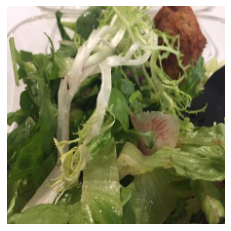

-----------------------
(1, 224, 224, 3)
1/1 [==============================] - 0s 69ms/step
% prediction is: 99.97
Output index is: [0]
The class in this image should be: caesar_salad.
The groud truth is caesar_salad .
-----------------------
caesar_salad


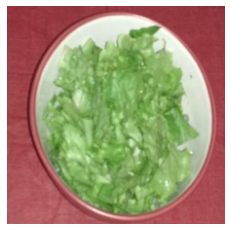

-----------------------
(1, 224, 224, 3)
1/1 [==============================] - 0s 134ms/step
% prediction is: 99.29
Output index is: [0]
The class in this image should be: caesar_salad.
The groud truth is caesar_salad .
-----------------------
hamburger


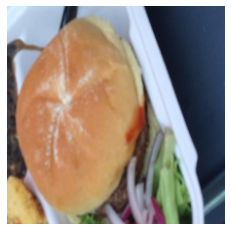

-----------------------
(1, 224, 224, 3)
1/1 [==============================] - 0s 93ms/step
% prediction is: 100.0
Output index is: [4]
The class in this image should be: hamburger.
The groud truth is hamburger .
-----------------------
hamburger


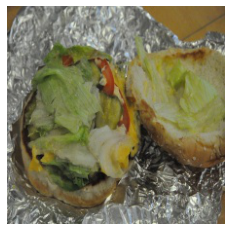

-----------------------
(1, 224, 224, 3)
1/1 [==============================] - 0s 83ms/step
% prediction is: 94.1
Output index is: [4]
The class in this image should be: hamburger.
The groud truth is hamburger .
-----------------------
hamburger


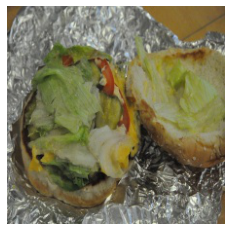

-----------------------
(1, 224, 224, 3)
1/1 [==============================] - 0s 136ms/step
% prediction is: 94.1
Output index is: [4]
The class in this image should be: hamburger.
The groud truth is hamburger .
-----------------------
hamburger


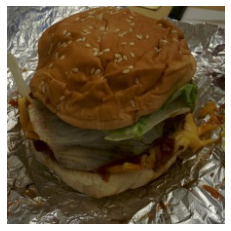

-----------------------
(1, 224, 224, 3)
1/1 [==============================] - 0s 129ms/step
% prediction is: 99.26
Output index is: [4]
The class in this image should be: hamburger.
The groud truth is hamburger .
-----------------------
hamburger


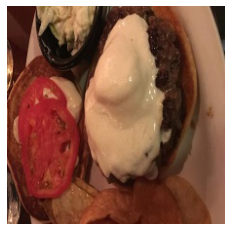

-----------------------
(1, 224, 224, 3)
1/1 [==============================] - 0s 90ms/step
% prediction is: 99.94
Output index is: [4]
The class in this image should be: hamburger.
The groud truth is hamburger .
-----------------------
sushi


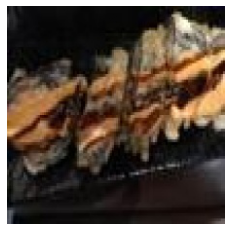

-----------------------
(1, 224, 224, 3)
1/1 [==============================] - 0s 138ms/step
% prediction is: 39.13
Output index is: [9]
I'm sorry, I cannot recognise any type of food here! Try again!
The groud truth is sushi
-----------------------
sushi


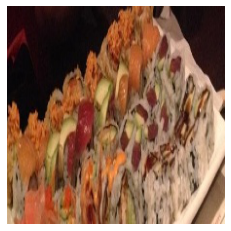

-----------------------
(1, 224, 224, 3)
1/1 [==============================] - 0s 164ms/step
% prediction is: 87.02
Output index is: [9]
The class in this image should be: sushi.
The groud truth is sushi .
-----------------------
sushi


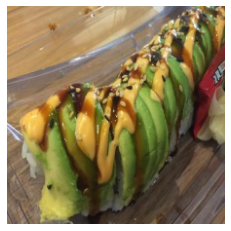

-----------------------
(1, 224, 224, 3)
1/1 [==============================] - 0s 72ms/step
% prediction is: 99.9
Output index is: [9]
The class in this image should be: sushi.
The groud truth is sushi .
-----------------------
sushi


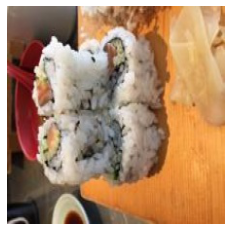

-----------------------
(1, 224, 224, 3)
1/1 [==============================] - 0s 69ms/step
% prediction is: 99.29
Output index is: [9]
The class in this image should be: sushi.
The groud truth is sushi .
-----------------------
sushi


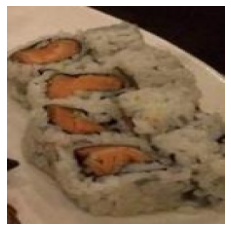

-----------------------
(1, 224, 224, 3)
1/1 [==============================] - 0s 74ms/step
% prediction is: 96.15
Output index is: [9]
The class in this image should be: sushi.
The groud truth is sushi .
-----------------------
rejection_class


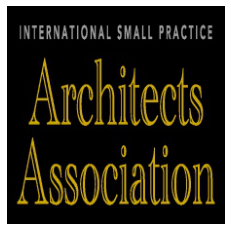

-----------------------
(1, 224, 224, 3)
1/1 [==============================] - 0s 70ms/step
% prediction is: 87.11
Output index is: [7]
The class in this image should be: rejection_class.
The groud truth is rejection_class .
-----------------------
rejection_class


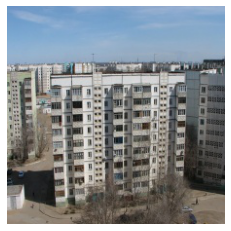

-----------------------
(1, 224, 224, 3)
1/1 [==============================] - 0s 70ms/step
% prediction is: 99.99
Output index is: [7]
The class in this image should be: rejection_class.
The groud truth is rejection_class .
-----------------------
rejection_class


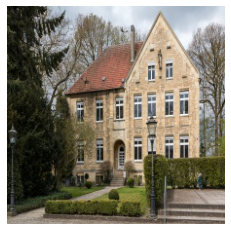

-----------------------
(1, 224, 224, 3)
1/1 [==============================] - 0s 89ms/step
% prediction is: 99.93
Output index is: [7]
The class in this image should be: rejection_class.
The groud truth is rejection_class .
-----------------------
rejection_class


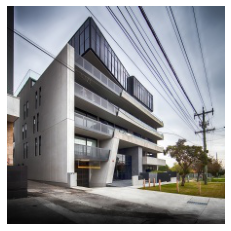

-----------------------
(1, 224, 224, 3)
1/1 [==============================] - 0s 89ms/step
% prediction is: 100.0
Output index is: [7]
The class in this image should be: rejection_class.
The groud truth is rejection_class .
-----------------------
rejection_class


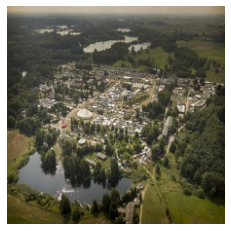

-----------------------
(1, 224, 224, 3)
1/1 [==============================] - 0s 83ms/step
% prediction is: 99.99
Output index is: [7]
The class in this image should be: rejection_class.
The groud truth is rejection_class .
-----------------------

Predicted: [2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 3, 9, 9, 3, 3, 4, 8, 8, 8, 6, 4, 5, 5, 4, 4, 0, 7, 7, 0, 0, 4, 4, 4, 4, 4, 9, 9, 9, 9, 9, 7, 7, 7, 7, 7]
Ground Truth [2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 3, 3, 3, 3, 3, 8, 8, 8, 8, 8, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 9, 9, 9, 9, 9, 7, 7, 7, 7, 7]


In [15]:
pred_output_list = list()
ground_truth_list = list()
ground_truth_dict = test_generator.class_indices

for image_path in inference_data:
  split_str = str(image_path).split("/")[-2] # get the folder name
  print(split_str)
  new_image = prepare_image(image_path)
  print(new_image.shape)
  pred = best_model.predict(new_image)
  print("% prediction is:", round(max(pred[0])*100, 2))

  # Generate arg maxes for predictions
  output_index = np.argmax(pred[[0]], axis = 1)
  # output_index = np.argmax(pred, axis = 1)
  print("Output index is:", output_index)

  pred_output_list.append(output_index[0])
  ground_truth_list.append(ground_truth_dict[f'{split_str}'])

  if max(pred[0]) < 0.50:
    print("I'm sorry, I cannot recognise any type of food here! Try again!")
    print("The groud truth is", split_str)
    print("-----------------------")
  else:
    value = [i for i in test_generator.class_indices if test_generator.class_indices[i]==np.argmax(pred, axis = 1)]
    print(f"The class in this image should be: {value[0]}.")
    print("The groud truth is", split_str, ".")
    print("-----------------------")
  
  # print("")
  # value = [i for i in test_generator.class_indices if test_generator.class_indices[i] == output_index]
  # print(f"The class predicted is: {value[0]}.")
  # print("------------------------ NEXT IMAGE ----------------------------")
  # print("")

print("")
print("Predicted:", pred_output_list)
print("Ground Truth", ground_truth_list)

In [16]:
# CREATE A DATAFRAME TO COMPARE THE RESULTS
df_comparison = pd.DataFrame({"predicted": pred_output_list, "ground truth": ground_truth_list})

df_comparison['comparison'] = np.where(df_comparison['predicted'] == df_comparison['ground truth'], 1, 
                                      np.where(df_comparison['predicted'] !=  df_comparison['ground truth'], 0, -1))

df_comparison

predicted  ground truth  comparison
0           2             2           1
1           2             2           1
2           2             2           1
3           2             2           1
4           2             2           1
5           1             1           1
6           1             1           1
7           1             1           1
8           1             1           1
9           1             1           1
10          6             6           1
11          6             6           1
12          6             6           1
13          6             6           1
14          6             6           1
15          3             3           1
16          9             3           0
17          9             3           0
18          3             3           1
19          3             3           1
20          4             8           0
21          8             8           1
22          8             8           1
23          8             8           1
24          6             8           0
25          4             5           0
26          5             5           1
27          5             5           1
28          4             5           0
29          4             5           0
30          0             0           1
31          7             0           0
32          7             0           0
33          0             0           1
34          0             0           1
35          4             4           1
36          4             4           1
37          4             4           1
38          4             4           1
39          4             4           1
40          9             9           1
41          9             9           1
42          9             9           1
43          9             9           1
44          9             9           1
45          7             7           1
46          7             7           1
47          7             7           1
48          7             7           1
49          7             7           1

In [17]:
# COMPUTE TOP-1 ACCURACY OVER THE TEN ELEMENTS
accuracy_over_test = round((np.sum(df_comparison['comparison'])/len(df_comparison))*100, 2)
print(f"Accuracy over {len(df_comparison)} images is:", accuracy_over_test, "%")

Accuracy over 50 images is: 82.0 %


In [18]:
# CLASSIFICATION REPORT
target_names = test_generator.class_indices
# PRINT THE CLASSIFICATION REPORT
print(classification_report(ground_truth_list, pred_output_list, target_names=target_names))

                 precision    recall  f1-score   support

   caesar_salad       1.00      0.60      0.75         5
  caprese_salad       1.00      1.00      1.00         5
   french_fries       1.00      1.00      1.00         5
    greek_salad       1.00      0.60      0.75         5
      hamburger       0.56      1.00      0.71         5
        hot_dog       1.00      0.40      0.57         5
          pizza       0.83      1.00      0.91         5
rejection_class       0.71      1.00      0.83         5
        sashimi       1.00      0.60      0.75         5
          sushi       0.71      1.00      0.83         5

       accuracy                           0.82        50
      macro avg       0.88      0.82      0.81        50
   weighted avg       0.88      0.82      0.81        50



In [35]:
def get_classification_report(y_test, y_pred, target_names):
    """
    Source: https://stackoverflow.com/questions/39662398/scikit-learn-output-metrics-classification-report-into-csv-tab-delimited-format
    """
    report = classification_report(y_test, y_pred, output_dict=True)
    df_classification_report = pd.DataFrame(report).transpose()
    df_classification_report.rename(index={"0": "caesar_salad",
                                           "1": "caprese_salad",
                                           "2": "french_fries",
                                           "3": "greek_salad",
                                           "4": "hamburger",
                                           "5": "hot_dog",
                                           "6": "pizza",
                                           "7": "rejection_class",
                                           "8": "sashimi",
                                           "9": "sushi"}, inplace=True)
    # df_classification_report = df_classification_report.sort_values(by=['recall'], ascending=False)

    return df_classification_report

In [36]:
# CLASSIFICATION REPORT
target_names = test_generator.class_indices
get_classification_report(ground_truth_list, pred_output_list, target_names)

precision  recall  f1-score  support
caesar_salad      1.000000    0.60  0.750000     5.00
caprese_salad     1.000000    1.00  1.000000     5.00
french_fries      1.000000    1.00  1.000000     5.00
greek_salad       1.000000    0.60  0.750000     5.00
hamburger         0.555556    1.00  0.714286     5.00
hot_dog           1.000000    0.40  0.571429     5.00
pizza             0.833333    1.00  0.909091     5.00
rejection_class   0.714286    1.00  0.833333     5.00
sashimi           1.000000    0.60  0.750000     5.00
sushi             0.714286    1.00  0.833333     5.00
accuracy          0.820000    0.82  0.820000     0.82
macro avg         0.881746    0.82  0.811147    50.00
weighted avg      0.881746    0.82  0.811147    50.00

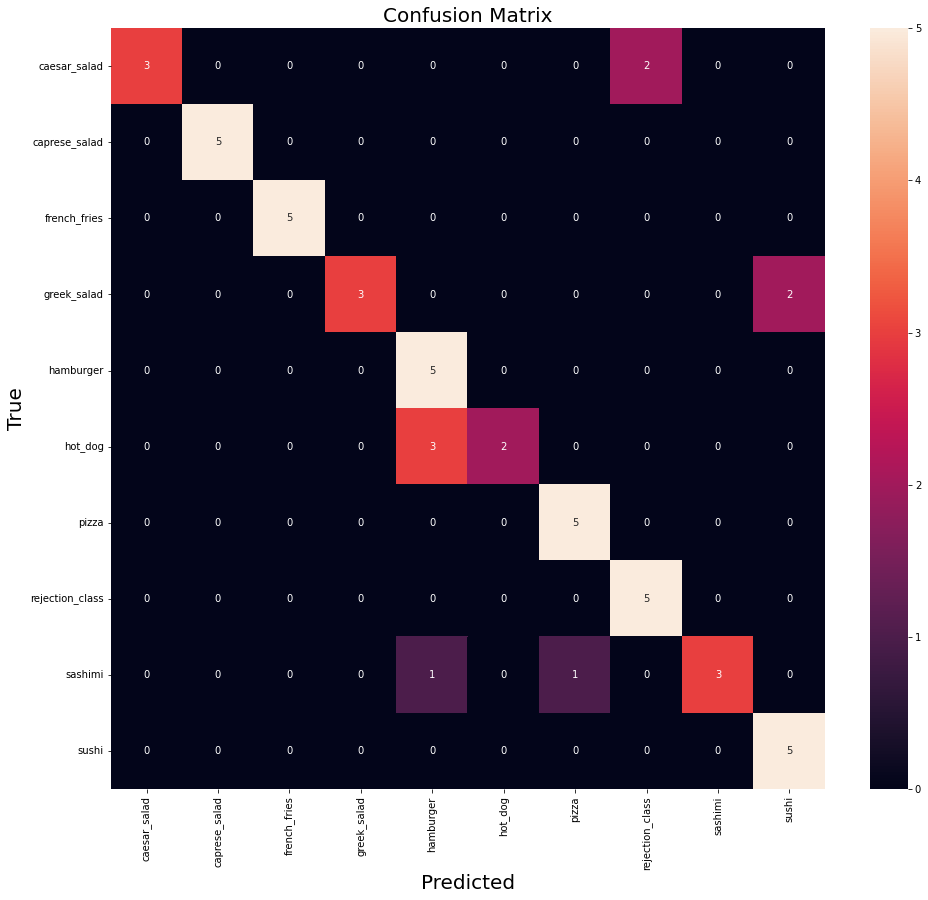

In [38]:
from sklearn.metrics import confusion_matrix
# SHOW A CONFUSION MATRIX OF THE RESULTS
cm = confusion_matrix(ground_truth_list, pred_output_list)

## Get Class Labels
class_names = target_names

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); # annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted', fontsize = 20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation = 90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize = 20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Confusion Matrix', fontsize = 20)
plt.show()

In [40]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

**CONVERT THIS FOLLOWING CODE TO A FUNCTION AND PUT IT ON THE UTILS.PY FILE**

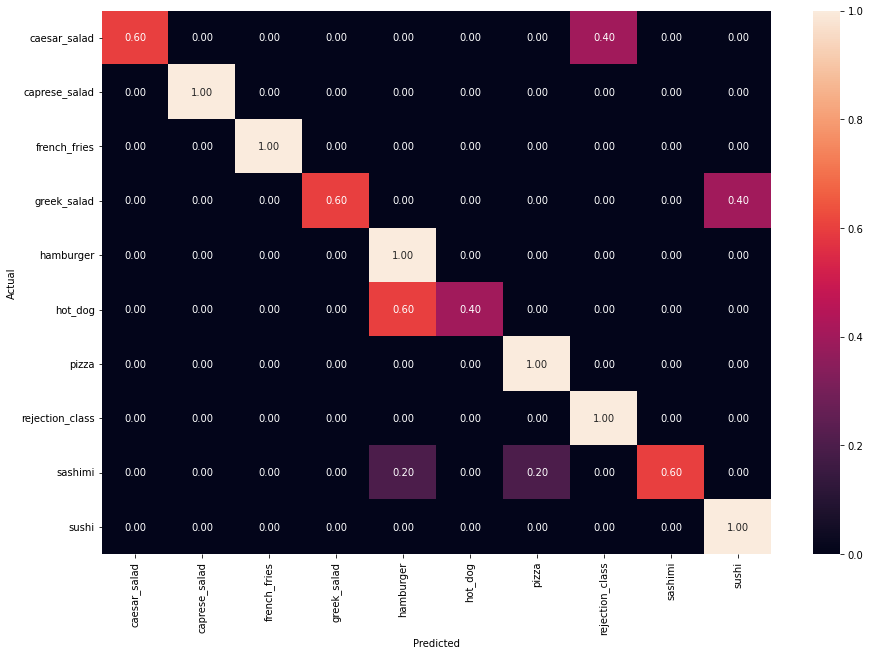

In [46]:
# https://stackoverflow.com/questions/65618137/confusion-matrix-for-multiple-classes-in-python
# https://gist.github.com/fclesio/bb5871281debc07d75127552c56b08b5
# https://stackoverflow.com/questions/20927368/how-to-normalize-a-confusion-matrix
cm = metrics.confusion_matrix(ground_truth_list, pred_output_list)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

# [TODO]
- COMPUTE TOP-3 ACCURACY AND NOT TOP-5 EXPLAINING THAT HAVING 9 CLASSES MEANS IT IS BETTER NOT TO USE THE top-5 accurac to not pollute the results!
- the top-1 accuracy is already given by the percentage output result; the top-5 is given in the last notebook where you use the webapp, showing the first 5 elements. You could just copy that code for the last notebook and showing the top-1 accuracy and the top-5 accuracy.

# References

- https://vijayabhaskar96.medium.com/multi-label-image-classification-tutorial-with-keras-imagedatagenerator-cd541f8eaf24

- https://www.tensorflow.org/api_docs/python/tf/keras/metrics/TopKCategoricalAccuracy


- https://vijayabhaskar96.medium.com/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720

- https://github.com/keras-team/keras/issues/14303



---



---



# OLDER SOLUTION

In [ ]:
# # # Capture training data and labels into respective lists
# # train_images = []
# # train_labels = [] 

# # # GET THE LABELS
# # for directory_path in glob.glob(DIR_TRAIN_DATA):
# #     tr_label = directory_path.split("/")[-1]
# #     print(tr_label)
# #     # GET THE IMAGES
# #     for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
# #         # print(img_path)
# #         img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
# #         img = cv2.resize(img, (SIZE, SIZE))
# #         img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
# #         train_images.append(img)
# #         train_labels.append(tr_label)

# # # CONVERT LISTS TO ARRAYS
# # train_images = np.array(train_images)
# # train_labels = np.array(train_labels)

# ################################################################
# # CAPTURE TEST/VALIDATION DATA AND LABELS INTO RESPECTIVE LISTS

# test_images = []
# test_labels = [] 
# for directory_path in glob.glob(DIR_TEST_DATA):
#     tt_label = directory_path.split("/")[-1]
#     for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
#         img = cv2.imread(img_path, cv2.IMREAD_COLOR)
#         img = cv2.resize(img, (SIZE, SIZE))
#         img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
#         test_images.append(img)
#         test_labels.append(tt_label)

# #Convert lists to arrays                
# test_images = np.array(test_images)
# test_labels = np.array(test_labels)

In [ ]:
# def prep_fn(img):
#     img = img.astype(np.float32) / 255.0
#     img = (img - 0.5) * 2
#     return img

In [ ]:
# preprocess_input_mobilenetV2 = tf.keras.applications.mobilenet_v2.preprocess_input

In [ ]:
# base_path_train = '/content/gdrive/MyDrive/Data_Science_2020-2022/Secondo_anno_Secondo_Semestre/FoDL_Project/Project_Example_Food/train_test/train/'

# # train_datagen_mnetv2 = ImageDataGenerator(preprocessing_function = preprocess_input_mobilenetV2)
# train_datagen_mnetv2 = ImageDataGenerator()

# train_generator_mnetv2 = train_datagen_mnetv2.flow_from_directory(
#     base_path_train,
#     target_size=(224, 224),
#     color_mode="rgb",
#     batch_size=16,
#     shuffle=True,
#     class_mode="categorical",
#     seed = SEED_VALUE)

# # test_datagen_mnetv2 = ImageDataGenerator() # rescale=1./255
# # test_datagen_mnetv2 = ImageDataGenerator(preprocessing_function = preprocess_input_mobilenetV2) 
# test_datagen_mnetv2 = ImageDataGenerator()

# # TOGLIERE: USARE SOLO NEL NOTEBOOK DI TEST!
# test_generator = test_datagen_mnetv2.flow_from_directory(
#     base_path_test,
#     target_size=(SIZE, SIZE), # target_size=(224,224),
#     color_mode="rgb",
#     batch_size=1,
#     # batch_size=batch_size,
#     shuffle=False,
#     # class_mode="categorical",
#     class_mode=None,
#     seed = SEED_VALUE)

In [ ]:
# ground_truth_dict = test_generator.class_indices
# ground_truth_dict

In [ ]:
# # LOAD SAVED MODEL AND GET PATH FOR AN IMAGE
# best_model = tf.keras.models.load_model("/content/gdrive/MyDrive/Data_Science_2020-2022/Secondo_anno_Secondo_Semestre/FoDL_Project/Project_Example_Food/saved_models/model_mobilenetV2_SECONDA_PROVA_FUNZIONANTE.h5") 

In [ ]:
# STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

# # test_generator.reset() # https://vijayabhaskar96.medium.com/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720

# pred = best_model.predict(test_generator, 
#                           steps=STEP_SIZE_TEST)

In [ ]:
# len(pred)

In [ ]:
# predicted_class_indices=np.argmax(pred,axis=1)

In [ ]:
# predicted_class_indices

In [ ]:
# labels = (train_generator_mnetv2.class_indices)
# labels = dict((v,k) for k,v in labels.items())
# predictions = [labels[k] for k in predicted_class_indices]

In [ ]:
# test_generator.filenames

In [ ]:
# filenames=test_generator.filenames
# # filenames=train_generator_mnetv2.filenames
# results=pd.DataFrame({"Filename":filenames,
#                       "Predictions":predictions})
# results.to_csv("results.csv",index=False)